<a href="https://colab.research.google.com/github/ekselan/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/123_Copy_of_LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
# TODO - code!

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

## 1) Write a function
```def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):```

In this example, imagine that individuals are taking a breathalyzer test with an **8% false positive rate**, a **100% true positive rate**, and that our **prior belief about drunk driving in the population is 1/1000**.

In [74]:
def prob_drunk_given_positive (prob_drunk_prior, false_positive_rate,
                               true_positive_rate):
  pdgp = (true_positive_rate * prob_drunk_prior) / (false_positive_rate)
  return (pdgp)

prob_drunk_given_positive(.001,.08,1)

0.0125

- What is the probability that a person is drunk after one positive breathalyzer test?




In [0]:
# The probability that a person is drunk after one positive test is 
# 1.25%

- What is the probability that a person is drunk after two positive breathalyzer tests?

In [76]:
prob_drunk_given_positive(.0125,.08,1)

# The probability that a person is drunk after two positive tests is 15.6%

0.15625

- How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

In [81]:
# Get the function to iterate multiple times using the previous result
# (Took several tries to get to this one - As always, the solution was much more
# simple!)

def prob_given_positive (prior, false_positive_rate, true_positive_rate):
  pdgp = prior
  for i in range(5):
    pdgp = (true_positive_rate * pdgp) / (false_positive_rate)
    print (pdgp)

prob_given_positive(.001,.08,1)

0.0125
0.15625
1.953125
24.4140625
305.17578125


In [0]:
'''
It would take 3 tests to have greater than 95% confidence that a person is drunk
'''

## 2) Explore scipy.stats.bayes_mvs



*   Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach.



In [83]:
# Read in some data to run the calculations on

housing = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv',
                    )
print(housing.shape)
#housing.head()

(1460, 81)


In [85]:
housing = housing.dropna(axis=1)
print(housing.shape)
housing.head()

(1460, 62)


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [116]:
# Create a sample

observed = housing['SalePrice']
observed 

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [0]:
# Turn into array
#observed = observed.values
#observed

In [0]:
# Frequentist approach (chi^2)
def conf_int (sample, confidence=0.95):
  # Set definitions
  sample = np.array(sample)
  mean = np.mean(sample)
  n = len(sample)
  s = sample.std(ddof=1)
  # Calculate the standard error
  stderr = s / np.sqrt(n)
  # Calculate the t statistic for 95% confidence
  t = stats.t.ppf((1 + confidence) / 2, n-1)
  # Calculate margin of error
  moe = t*stderr
  return (mean, mean-moe, mean+moe)

In [117]:
mean, lower, upper = conf_int(observed)

print('mean:',mean)
print('lower:',lower)
print('upper:',upper)

mean: 180921.19589041095
lower: 176842.84104108496
upper: 184999.55073973694


In [118]:
# Assign confidence interval to variable for easier plotting

CI_freq = conf_int(observed)

CI_freq

(180921.19589041095, 176842.84104108496, 184999.55073973694)

In [119]:
# Calculate bayesian confidence intervals

mean, _, _ = stats.bayes_mvs(observed, alpha=.95)

print(mean)

Mean(statistic=180921.19589041095, minmax=(176847.62011261735, 184994.77166820454))


In [120]:
CI_bayes = mean

CI_bayes

Mean(statistic=180921.19589041095, minmax=(176847.62011261735, 184994.77166820454))

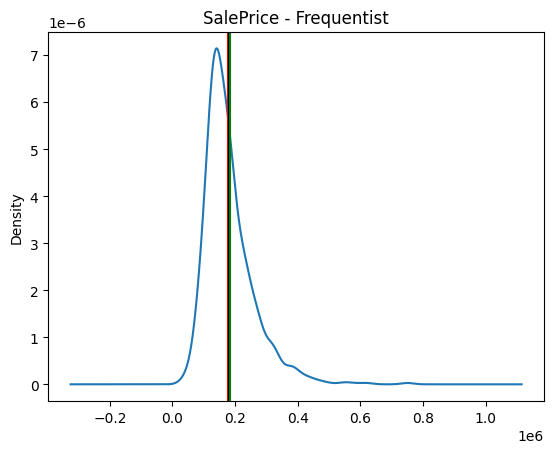

In [149]:
# Plot frequentist

observed.plot.density()
plt.title('SalePrice - Frequentist')
plt.axvline(x=CI_freq[1], color='red')
plt.axvline(x=CI_freq[0], color='black')
plt.axvline(x=CI_freq[2], color='green')
plt.show()

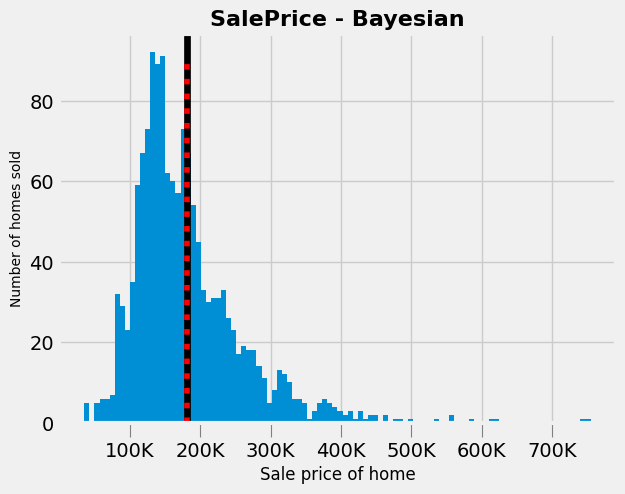

In [173]:
# Bayesian plot using scipy.stats.bayes_mvs example

fig = plt.figure()
ax = fig.add_subplot()
plt.style.use('fivethirtyeight')
ax.hist(observed, bins=100)
ax.set_title('SalePrice - Bayesian', fontsize=16, fontweight='bold')
ax.set_xticks(range(100000,1000000, 100000))
ax.set_xticklabels(['100K','200K','300K','400K','500K','600K','700K','800K'])
ax.set_xlabel('Sale price of home', fontsize=12)
ax.set_ylabel('Number of homes sold', fontsize=10)

# Introduce lines to show mean
ax.vlines(CI_bayes.statistic, ymin=0, ymax=90, color='red', linestyles='dotted')
ax.axvspan(CI_bayes.minmax[0],CI_bayes.minmax[1], color='black')

ax.tick_params(axis='x', direction='out', color='grey', length=10)

plt.show()

## 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

In [0]:
'''
The main difference between Bayesian and Frequentist statistics is the way a 
Bayesian process treats prior information and new information.

In a frequentist approach, the only 'prior' data that is considered is what has
been observed, so new information isn't weighted appropriately until the sample
size is large enough.

In contrast, Bayesian makes use of previous knowledge and this can facilitate
the process of interpreting new information. For this reason, a Bayesian process
could work better in small sample sizes, but will still improve as the sample 
grows.

'''

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!